# Steps:
    1. Data cleaning and preparation
    

In [69]:
#Import all required libraries:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None

In [3]:
leads_df = pd.read_csv('datasets/Leads.csv')

In [4]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Inspecting Dataframe
leads_df.shape

(9240, 37)

- Provided dataset has 9240 rows and 37 columns

In [6]:
#Lets check the statistical summary of dataset.
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 ### For simplicity, renameing column names of dataframe. Basically replacing ' ' with '_'

In [7]:
leads_df.columns = leads_df.columns.map(lambda x : x.replace(' ','_'))

In [8]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Number                                    9240 non-null   int64  
 2   Lead_Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do_Not_Email                                   9240 non-null   object 
 5   Do_Not_Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total_Time_Spent_on_Website                    9240 non-null   int64  
 9   Page_Views_Per_Visit                           9103 

- The are many values as 'Select' in dataset, which is equivalent to null [As mentioned in problem statement]
    - Resaon: In the UI, for the fields which has drop down for options to select, if user doesn't select anything, the default value is 'Select'
    - Hence, replacing all such values as null

In [9]:
leads_df.replace('Select', np.nan, inplace=True)

In [10]:
leads_df.nunique(axis=0)

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                         5
Lead_Source                                        21
Do_Not_Email                                        2
Do_Not_Call                                         2
Converted                                           2
TotalVisits                                        41
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                              114
Last_Activity                                      17
Country                                            38
Specialization                                     18
How_did_you_hear_about_X_Education                  9
What_is_your_current_occupation                     6
What_matters_most_to_you_in_choosing_a_course       3
Search                                              2
Magazine                                            1
Newspaper_Article           

- We can see there are few columns for which distinct value count is 1, hence dropping all such columns

In [11]:
to_drop_1 = ['Magazine','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content',
            'Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque']

In [12]:
leads_df.drop(to_drop_1, axis=1,inplace=True)

In [13]:
# Handling null values 
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Educatio

- Observation:
    - There are many columns with most of the values as null. 
    - Hence, dropping columns with null values more than 40%
    - 'City' Column is also approx to 40%, we can consider 'City column also to drop

In [14]:
to_drop_2 = ['How_did_you_hear_about_X_Education','Lead_Quality','Lead_Profile','Asymmetrique_Activity_Index',
            'City','Asymmetrique_Activity_Index','Asymmetrique_Profile_Index','Asymmetrique_Activity_Score',
            'Asymmetrique_Profile_Score']

In [15]:
leads_df.drop(to_drop_2, axis=1, inplace=True)

In [16]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Number                                    9240 non-null   int64  
 2   Lead_Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do_Not_Email                                   9240 non-null   object 
 5   Do_Not_Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total_Time_Spent_on_Website                    9240 non-null   int64  
 9   Page_Views_Per_Visit                           9103 

In [17]:
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper 

- 2 columns with 36% of values as null
    - Tags
    - Specialization
- Lets analyze both the categorical column and see significance

In [18]:
leads_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [19]:
leads_df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

- Observation:
    - Specialization : From values we see they are some predefined categories 
    - Tags : Whereas, Tags seems to be like comments, which varies.
- Hence, dropping column 'Tags'

In [20]:
leads_df.drop('Tags', axis=1, inplace=True)

In [21]:
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Newspaper_Article                                 0.00
X_Education_Forums                                0.00
Newspaper 

- Observation:
    - 4 columns with higher percentage of missing values:
        - Considering the problem statement, these columns seems to important and hence, its not good to drop those columns.
        - Therefore, replacing the null values of with 'NA' (Additional category)
    - For other columns with minimal percentage of null values:
        - Choosing rows with sum less than 1

In [22]:
##df3 = df2[df2.isnull().sum(axis=1) <1]
leads_df= leads_df[leads_df.isnull().sum(axis=1) < 1]

In [23]:
## - Checking null values percentage 
round((leads_df.isnull().sum()/len(leads_df.index))*100, 2)

Prospect_ID                                      0.0
Lead_Number                                      0.0
Lead_Origin                                      0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
Page_Views_Per_Visit                             0.0
Last_Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What_is_your_current_occupation                  0.0
What_matters_most_to_you_in_choosing_a_course    0.0
Search                                           0.0
Newspaper_Article                                0.0
X_Education_Forums                               0.0
Newspaper                                     

In [34]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 2 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    4019 non-null   object 
 1   Lead_Number                                    4019 non-null   int64  
 2   Lead_Origin                                    4019 non-null   object 
 3   Lead_Source                                    4019 non-null   object 
 4   Do_Not_Email                                   4019 non-null   object 
 5   Do_Not_Call                                    4019 non-null   object 
 6   Converted                                      4019 non-null   int64  
 7   TotalVisits                                    4019 non-null   float64
 8   Total_Time_Spent_on_Website                    4019 non-null   int64  
 9   Page_Views_Per_Visit                           4019 

- Observation :
    - There are two columns **'Page_Views_Per_Visit' and 'Total_Time_Spent_on_Website** tagged as object, however, they should be numeric as per data dictionary 
    - Hence, converting both columns to nummeric

In [36]:
leads_df['Page_Views_Per_Visit']=pd.to_numeric(leads_df.Page_Views_Per_Visit)
leads_df['Total_Time_Spent_on_Website']=pd.to_numeric(leads_df.Total_Time_Spent_on_Website)

In [37]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 2 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    4019 non-null   object 
 1   Lead_Number                                    4019 non-null   int64  
 2   Lead_Origin                                    4019 non-null   object 
 3   Lead_Source                                    4019 non-null   object 
 4   Do_Not_Email                                   4019 non-null   object 
 5   Do_Not_Call                                    4019 non-null   object 
 6   Converted                                      4019 non-null   int64  
 7   TotalVisits                                    4019 non-null   float64
 8   Total_Time_Spent_on_Website                    4019 non-null   int64  
 9   Page_Views_Per_Visit                           4019 

In [38]:
# Both the columns are converted into Numeric

In [63]:
### Data Imbalance Check

In [65]:
round((leads_df.Converted.sum()/len(leads_df.Converted.index))*100)

47

- Its 47%, which means data is not imbalanced

# EDA

- 1. Univariant Analysis - Categorical Columns

In [39]:
# Create two differnt datasets based on target feature viz. "Converted"
## 1. df_0 -> records for which converted = 0 
## 2. df_1 -> records for which converted = 1

In [57]:
df_0 = leads_df[leads_df.Converted == 0]
df_1 = leads_df[leads_df.Converted == 1]

In [58]:
#Creating list of columns for which Dtype is object. Which means they are categoical columns \
cat_cols = list(leads_df.select_dtypes(include='object').columns)

In [59]:
cat_cols

['Prospect_ID',
 'Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Last_Activity',
 'Country',
 'Specialization',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Search',
 'Newspaper_Article',
 'X_Education_Forums',
 'Newspaper',
 'Digital_Advertisement',
 'Through_Recommendations',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

- Two columns 'Prospect_ID' and 'Lead_Origin' are identifiers of each row, hence removing it from categorical columms list for Univariant analysis

In [60]:
cat_cols = cat_cols[2:]

In [76]:
## Function to plot comparision between Converted and Non Converted based on Categorical columns\
def plot_cat_cols(df_0, df_1, col, rot=0):

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    ## PLOT1
    sns.countplot(x=col, data=df_0,ax=ax1,palette='Reds_r')
    ax1.set_title('Not Converted',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rot, ha="right")
    
    #Additing annotation in plots for better analysis
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_0))*100), (p.get_x()+0.1, p.get_height()+50))
    #---------------------------------------------
    ## PLOT2
    sns.countplot(x=col, data=df_1,ax=ax2, palette='Greens_r')
    ax2.set_title('Converted',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=rot, ha="right")
    
    #Additing annotation in plots for better analysis
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

------For Column : 'Lead_Source' --------


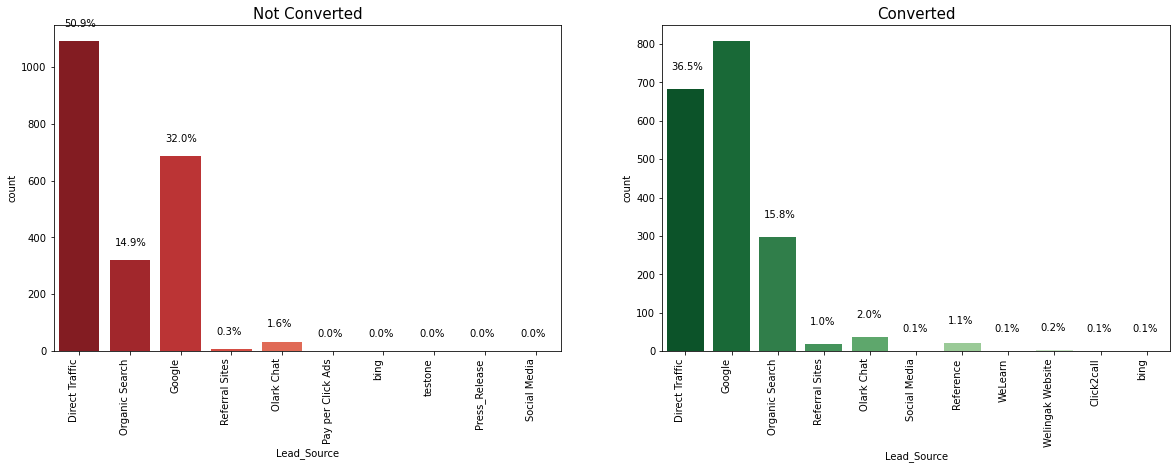



------For Column : 'Do_Not_Email' --------


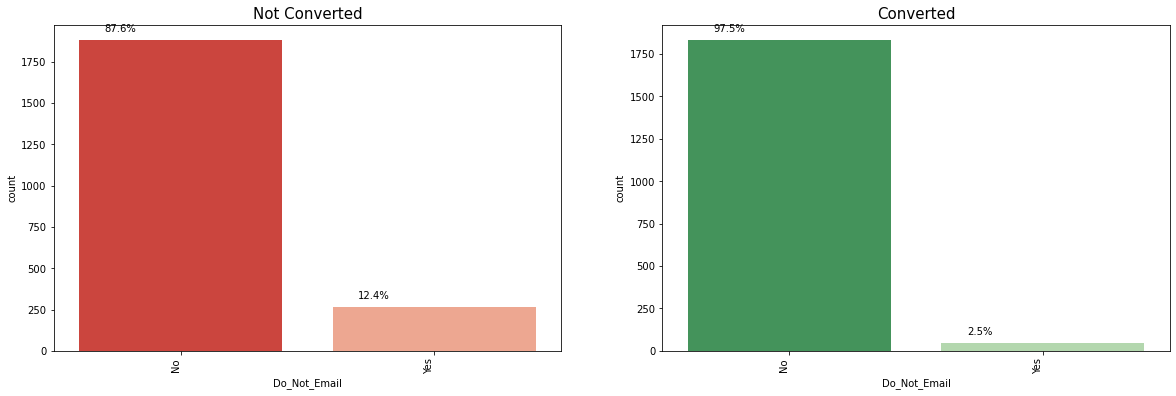



------For Column : 'Do_Not_Call' --------


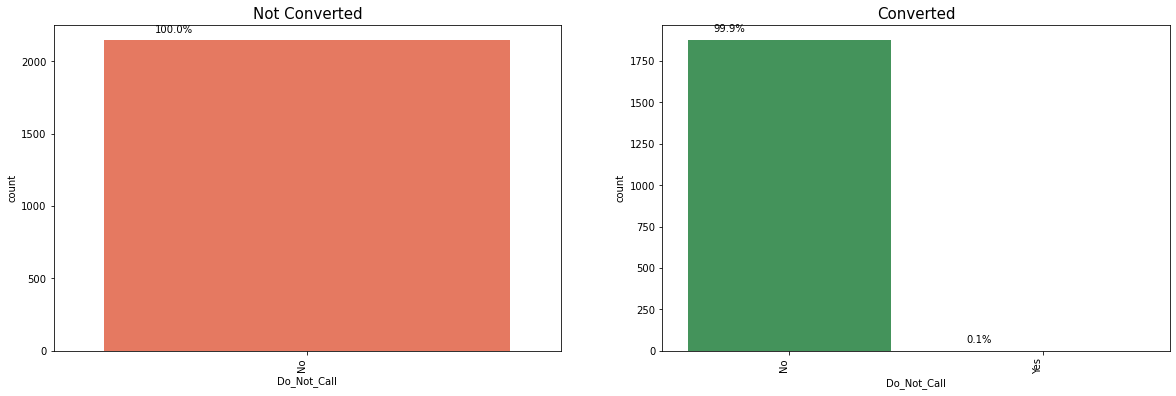



------For Column : 'Last_Activity' --------


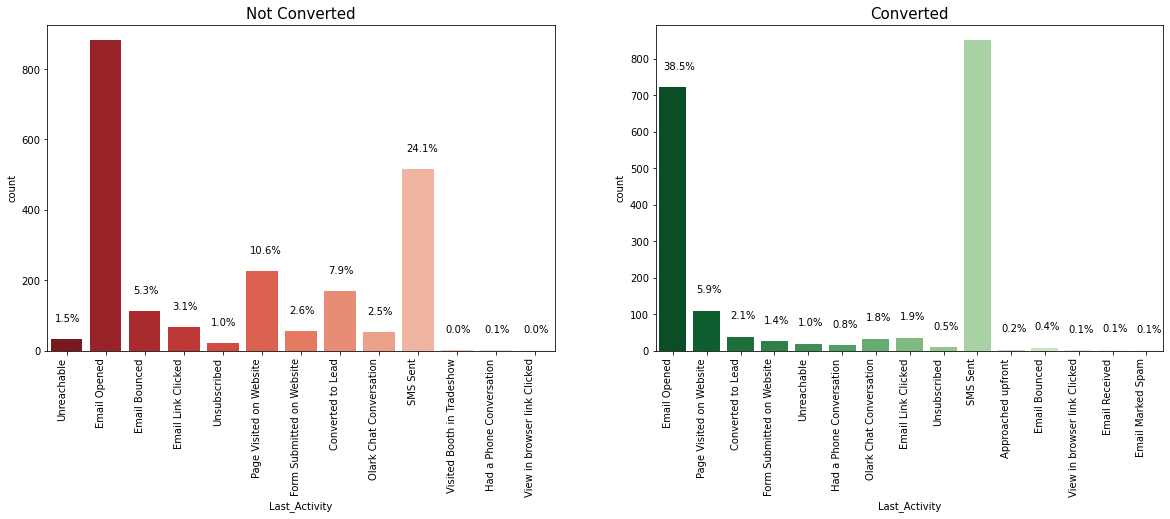



------For Column : 'Country' --------


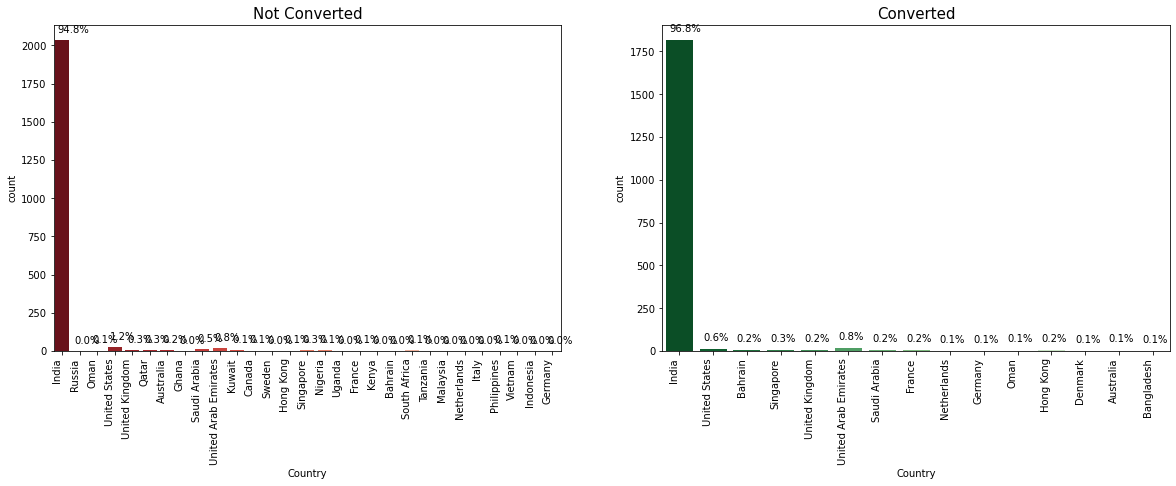



------For Column : 'Specialization' --------


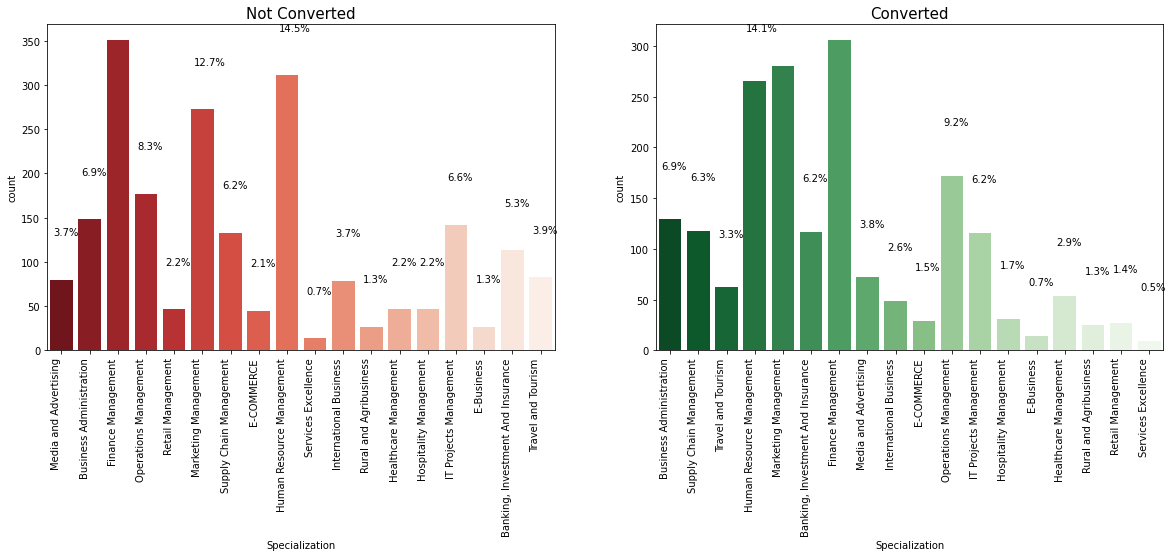



------For Column : 'What_is_your_current_occupation' --------


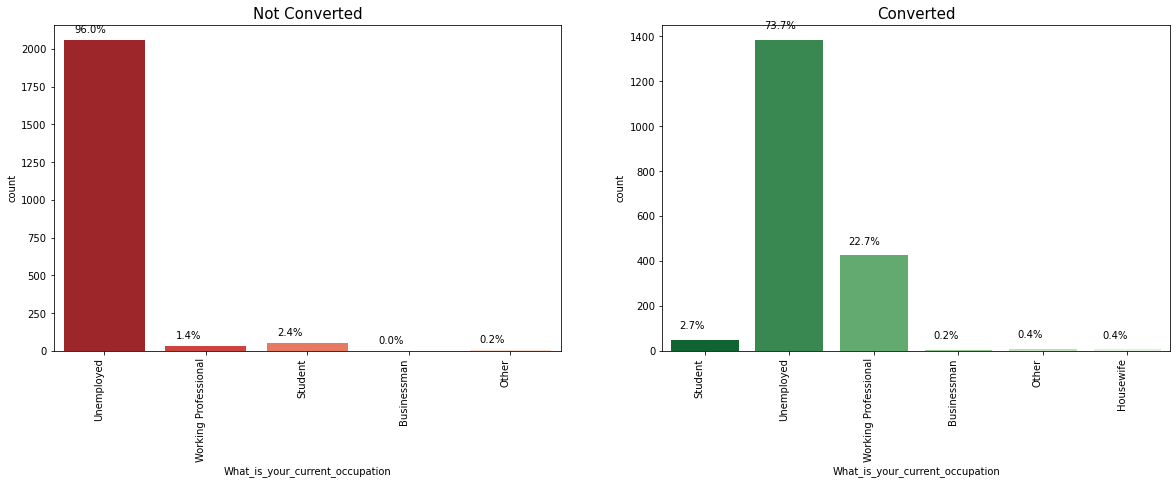



------For Column : 'What_matters_most_to_you_in_choosing_a_course' --------


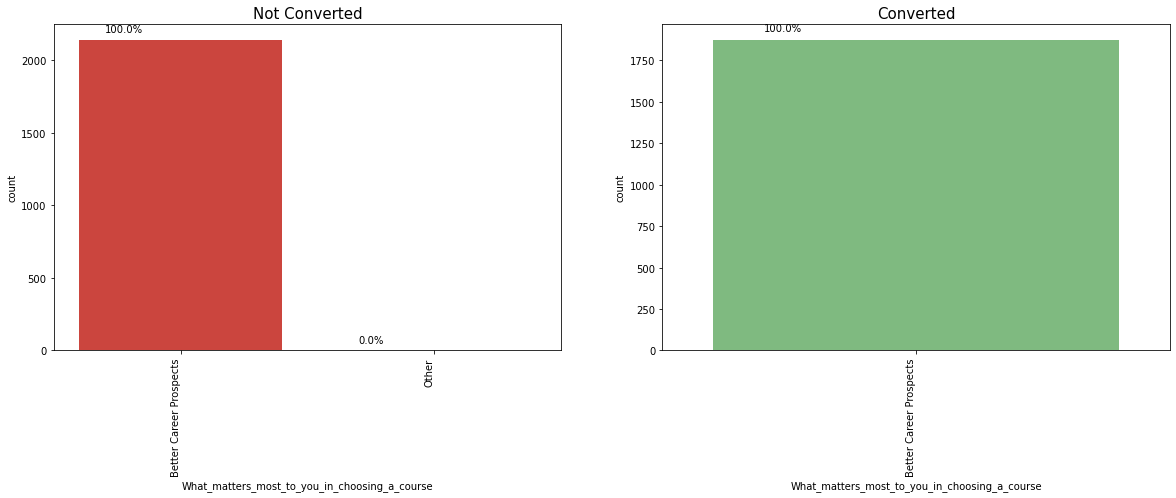



------For Column : 'Search' --------


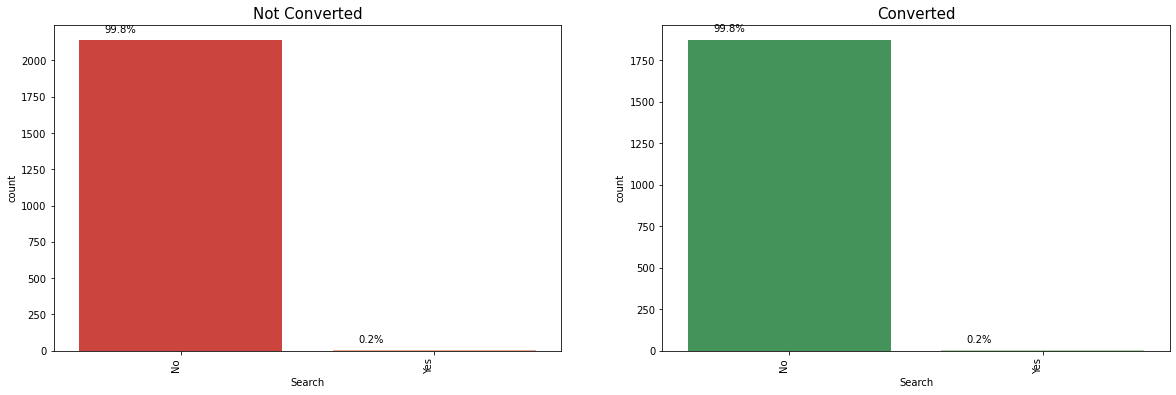



------For Column : 'Newspaper_Article' --------


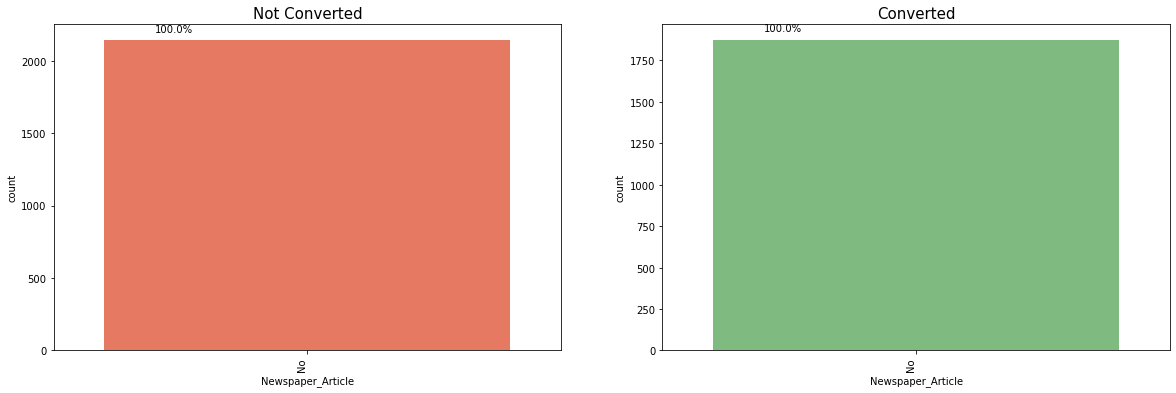



------For Column : 'X_Education_Forums' --------


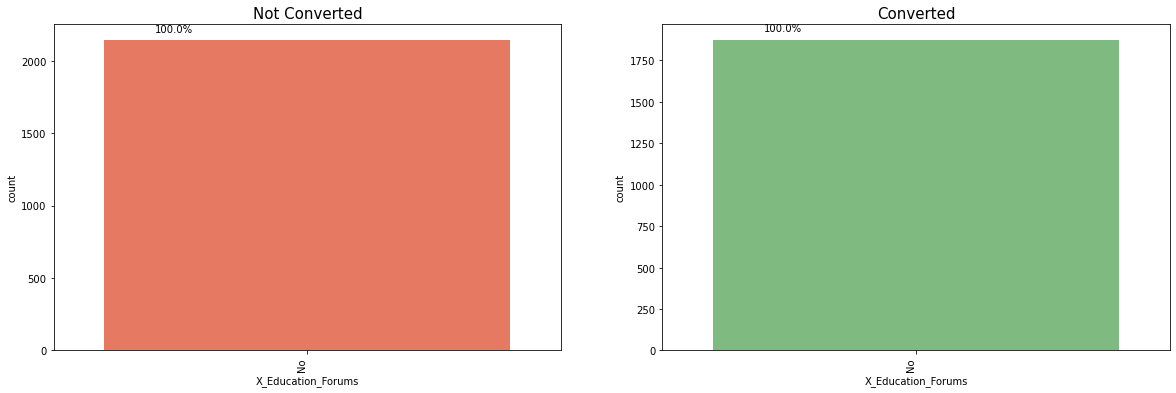



------For Column : 'Newspaper' --------


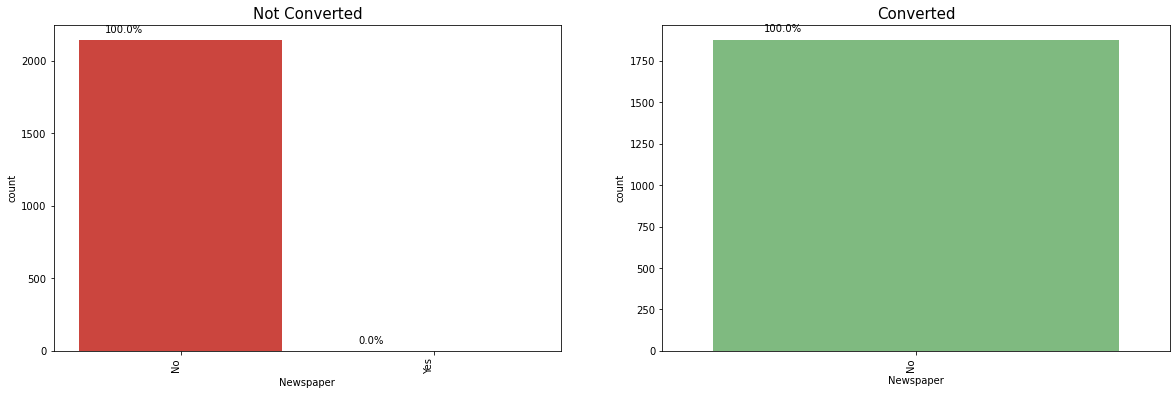



------For Column : 'Digital_Advertisement' --------


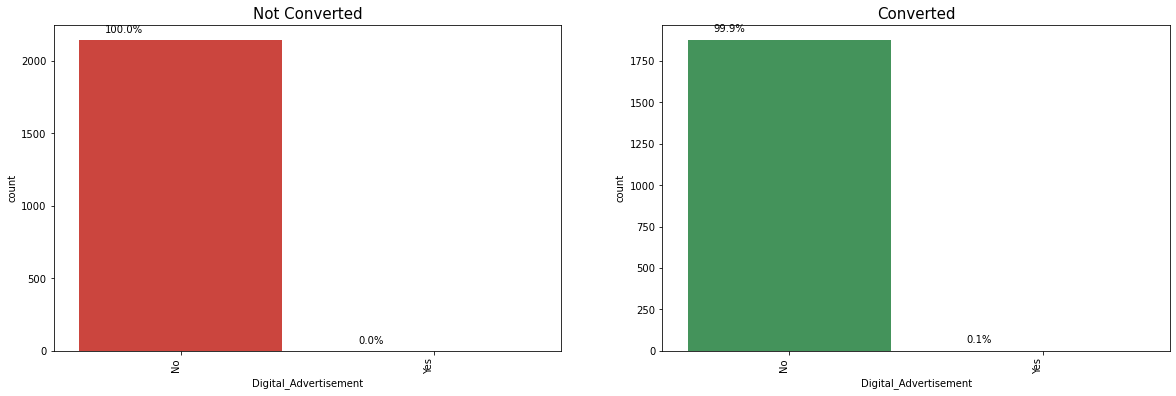



------For Column : 'Through_Recommendations' --------


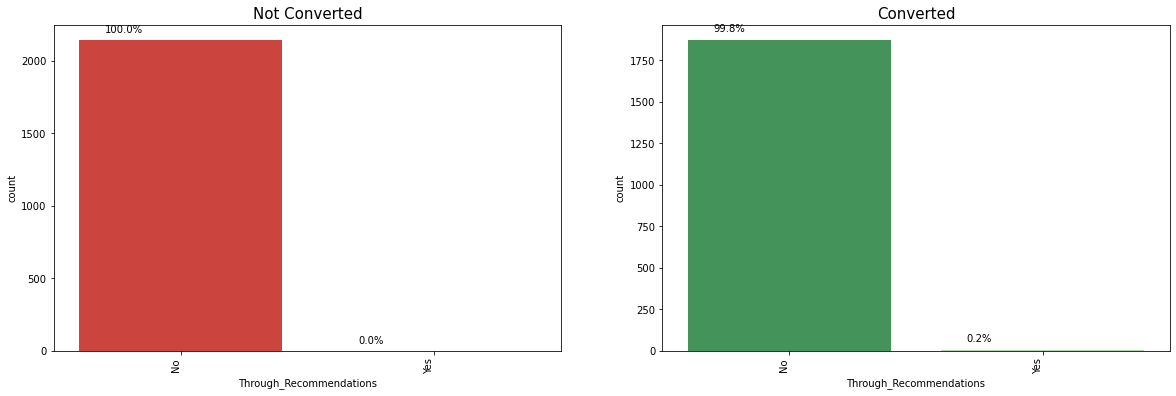



------For Column : 'A_free_copy_of_Mastering_The_Interview' --------


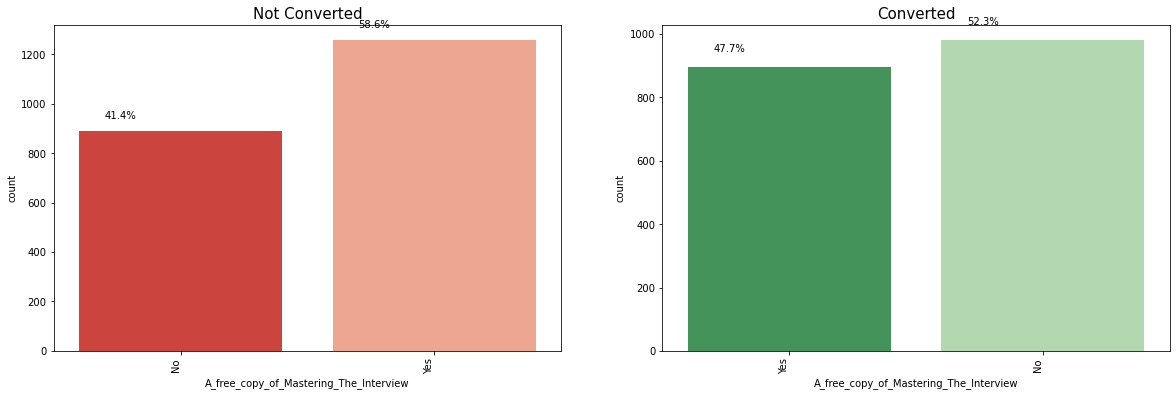



------For Column : 'Last_Notable_Activity' --------


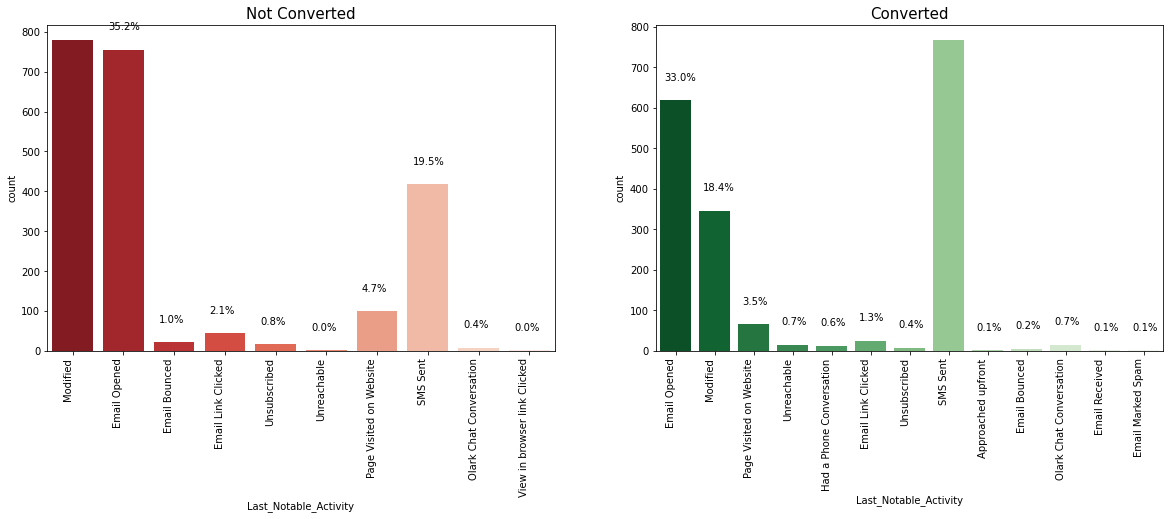

In [77]:
for i in cat_cols:
    print(f"""------For Column : '{i}' --------""")
    plot_cat_cols(df_0,  df_1, i, rot=90)
    print('\n')
    

- From above graphs, we see most of the columns have 99% single value or 100%, Like **'Do_Not_Call', 'X_Education_Forums'** etc

In [84]:
leads_df.Do_Not_Call.value_counts()

No     4018
Yes       1
Name: Do_Not_Call, dtype: int64

In [85]:
leads_df.X_Education_Forums.value_counts()

No    4019
Name: X_Education_Forums, dtype: int64

- Therefore, dropping all such features

In [86]:
to_drop_3 = ['Do_Not_Call','Country','What_matters_most_to_you_in_choosing_a_course','Search',
            'Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement',
            'Through_Recommendations']

In [87]:
leads_df.drop(to_drop_3, axis=1, inplace=True)

In [88]:
leads_df.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


- 2. Univariant Analysis - Numerical Columns

In [110]:
num_cols = list(leads_df.select_dtypes(include=['int64','float64']).columns)

In [111]:
num_cols

['Lead_Number',
 'Converted',
 'TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit']

In [112]:
#Again column 'Lead Number' is an Identifier, hence dropping it from list for analysis
num_cols= num_cols[2:]

In [113]:
## Function to plot distribution in categorical variables
def plot_dist(col):
    f,(ax1,ax2) = plt.subplots(1,2,sharey=True,gridspec_kw={'width_ratios':[1,1]},figsize=(15,4))
    print("                            For : ",i)
    plt1=sns.distplot(df_0[col], ax=ax1,hist = False, color='Red')
    plt1.axes.set_title('Not Converted')
    
    plt2=sns.distplot(df_1[col], ax=ax2,hist = False, color='Green')
    plt2.axes.set_title('Converted')
    plt.show()

                            For :  TotalVisits


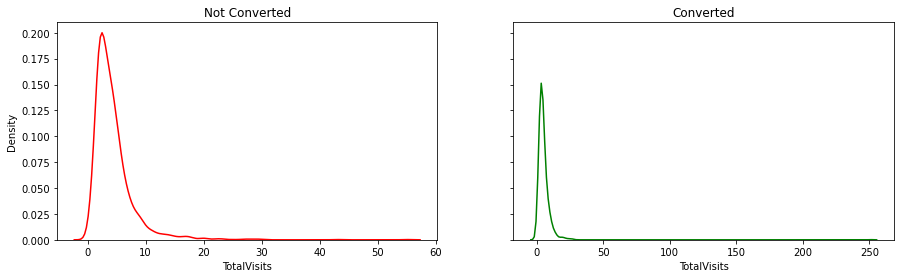

                            For :  Total_Time_Spent_on_Website


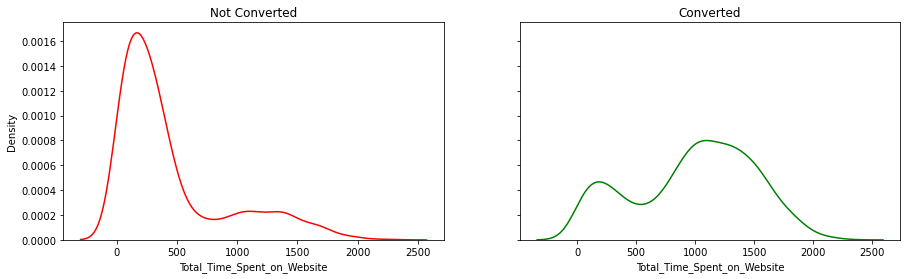

                            For :  Page_Views_Per_Visit


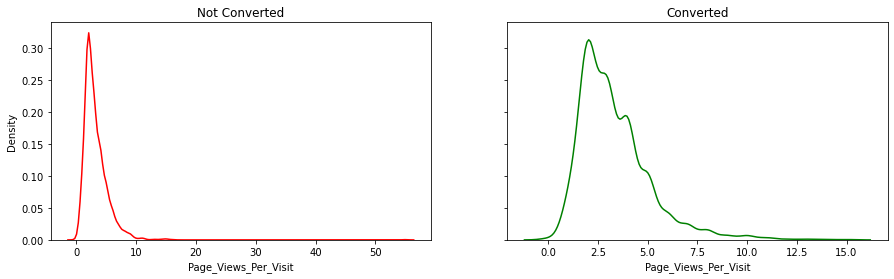

In [114]:
for i in num_cols:
    plot_dist(i)

- Bivarient Analysis

<AxesSubplot:>

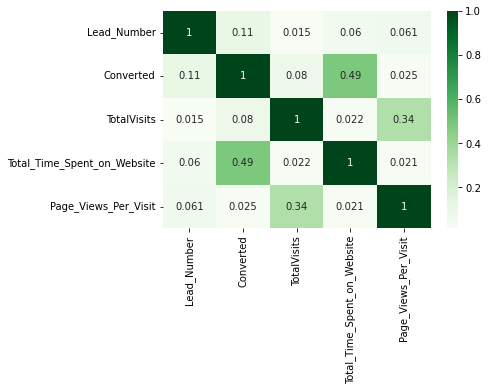

In [117]:
sns.heatmap(leads_df.corr(), annot=True,cmap='Greens')

- Observation:
    - As 'Converted' column is target, we can ignore in correlation
    - Columns 'Page_Views_Per_Visit' and 'TotalVisits' seems to be correalted much if we compared but value is not much.
    - Hence, no action